In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [0]:
import numpy as np

In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info= True, as_supervised= True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6PB25W/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6PB25W/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6PB25W/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:

train_data, test_data = imdb['train'], imdb['test']

In [0]:
tokenizer = info.features['text'].encoder

In [6]:
print(tokenizer.subwords)
print(tokenizer.vocab_size)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [0]:
embedding_size = 64

In [15]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32,train_data.output_shapes))

for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Batch shape: (32, 1263)
label shape: (32,)
Batch shape: (32, 1088)
label shape: (32,)


# Regular Training

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_size),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [0]:
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_batches, epochs=10,
                    validation_data=test_batches, 
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 11s 14ms/step - loss: 0.4205 - accuracy: 0.8472 - val_loss: 0.3913 - val_accuracy: 0.8604
Epoch 2/10
782/782 [==============================] - 11s 15ms/step - loss: 0.3037 - accuracy: 0.8902 - val_loss: 0.3751 - val_accuracy: 0.8521
Epoch 3/10
782/782 [==============================] - 11s 15ms/step - loss: 0.2545 - accuracy: 0.9093 - val_loss: 0.3413 - val_accuracy: 0.8719
Epoch 4/10
782/782 [==============================] - 11s 15ms/step - loss: 0.2249 - accuracy: 0.9188 - val_loss: 0.3401 - val_accuracy: 0.8708
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.2013 - accuracy: 0.9275 - val_loss: 0.3432 - val_accuracy: 0.8687
Epoch 6/10
782/782 [==============================] - 11s 15ms/step - loss: 0.1864 - accuracy: 0.9346 - val_loss: 0.3652 - val_accuracy: 0.8667
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1701 - accuracy: 0.9402 - val_loss: 0.3604 - val_accuracy:

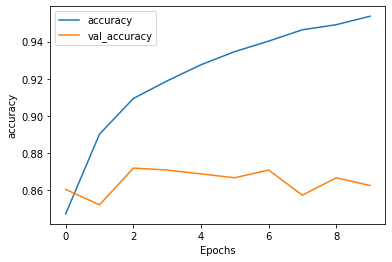

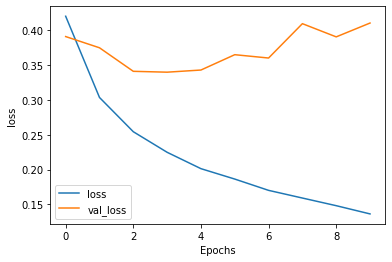

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Extra Zone

In [0]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [0]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [0]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 200
trunc_type = 'post'

training_tokens = []
training_labels = []
test_tokens = []
test_labels = []
for token, label in train_data:
  training_tokens.append(token.numpy())
  training_labels.append(label.numpy())
for token, label in test_data:
  test_tokens.append(token.numpy())
  test_labels.append(label.numpy())

training_tokens_padded = np.array(pad_sequences(training_tokens, maxlen=max_length, truncating=trunc_type))
training_tokens = np.array(training_tokens)
training_labels = np.array(training_labels)
test_tokens_padded = np.array(pad_sequences(test_tokens, maxlen=max_length, truncating=trunc_type))
test_tokens = np.array(test_tokens)
test_labels = np.array(test_labels)

print("Training Token Length : {} of {} dimension".format(len(training_tokens), training_tokens.shape))
print("Training Token Padded Length : {} of {} dimension".format(len(training_tokens_padded), training_tokens_padded.shape))
print("Training Label Length : {} of {} dimension".format(len(training_labels), training_labels.shape))
print("Test Token Length : {} of {} dimension".format(len(test_tokens), test_tokens.shape))
print("Test Token Padded Length : {} of {} dimension".format(len(test_tokens_padded), test_tokens_padded.shape))
print("Test Label Length : {} of {} dimension".format(len(test_labels), test_labels.shape))

Training Token Length : 25000 of (25000,) dimension
Training Token Padded Length : 25000 of (25000, 200) dimension
Training Label Length : 25000 of (25000,) dimension
Test Token Length : 25000 of (25000,) dimension
Test Token Padded Length : 25000 of (25000, 200) dimension
Test Label Length : 25000 of (25000,) dimension


In [0]:
extra_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_size),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [0]:
extra_model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [0]:
extra_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10

extra_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = extra_model.fit(training_tokens_padded, training_labels, epochs=num_epochs, validation_data=(test_tokens_padded, test_labels))

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5192 - accuracy: 0.7678 - val_loss: 0.3865 - val_accuracy: 0.8307
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3023 - accuracy: 0.8774 - val_loss: 0.3677 - val_accuracy: 0.8371
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2451 - accuracy: 0.9039 - val_loss: 0.3934 - val_accuracy: 0.8320
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2143 - accuracy: 0.9165 - val_loss: 0.4232 - val_accuracy: 0.8267
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1936 - accuracy: 0.9266 - val_loss: 0.4611 - val_accuracy: 0.8218
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1762 - accuracy: 0.9341 - val_loss: 0.5046 - val_accuracy: 0.8166
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1626 - accuracy: 0.9422 - val_loss: 0.5362 - val_accuracy: 0.8141

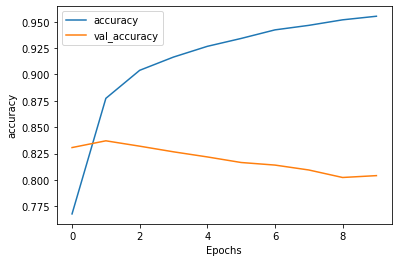

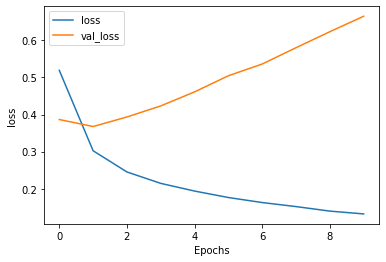

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# LSTM

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64, max_le),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')

])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [0]:
history = model.fit(train_batches, epochs=10,
                    validation_data=test_batches, 
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 127s 162ms/step - loss: 0.5817 - accuracy: 0.6968 - val_loss: 0.5416 - val_accuracy: 0.7427
Epoch 2/10
782/782 [==============================] - 126s 161ms/step - loss: 0.3442 - accuracy: 0.8621 - val_loss: 0.3547 - val_accuracy: 0.8552
Epoch 3/10
782/782 [==============================] - 127s 162ms/step - loss: 0.2233 - accuracy: 0.9172 - val_loss: 0.3127 - val_accuracy: 0.8760
Epoch 4/10
782/782 [==============================] - 126s 162ms/step - loss: 0.1646 - accuracy: 0.9433 - val_loss: 0.3643 - val_accuracy: 0.8844
Epoch 5/10
782/782 [==============================] - 127s 162ms/step - loss: 0.1233 - accuracy: 0.9584 - val_loss: 0.4393 - val_accuracy: 0.8729
Epoch 6/10
782/782 [==============================] - 127s 162ms/step - loss: 0.0899 - accuracy: 0.9726 - val_loss: 0.4695 - val_accuracy: 0.8708
Epoch 7/10
782/782 [==============================] - 126s 161ms/step - loss: 0.0732 - accuracy: 0.9782 - val_loss: 0.4549 -

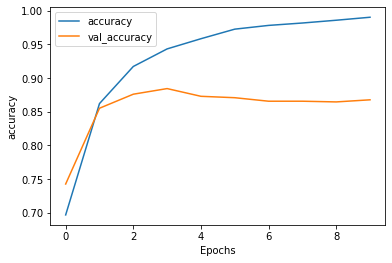

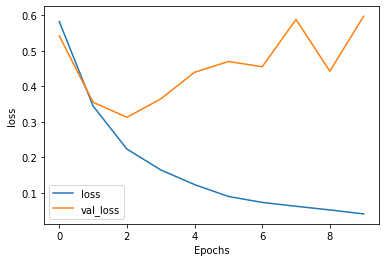

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# CNN training

In [0]:
max_len = 120

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64, input_length= max_len),
                             tf.keras.layers.Conv1D(120,5, activation= 'relu'),
                             tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')

])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           523840    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 120)          38520     
_________________________________________________________________
global_max_pooling1d (Global (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7744      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 570,169
Trainable params: 570,169
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [16]:
history = model.fit(train_batches, epochs=10,
                    validation_data=test_batches, 
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 32s 41ms/step - loss: 0.4020 - accuracy: 0.8057 - val_loss: 0.2989 - val_accuracy: 0.8802
Epoch 2/10
782/782 [==============================] - 18s 24ms/step - loss: 0.1628 - accuracy: 0.9386 - val_loss: 0.3297 - val_accuracy: 0.8771
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 0.0413 - accuracy: 0.9890 - val_loss: 0.4234 - val_accuracy: 0.8687
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0048 - accuracy: 0.9995 - val_loss: 0.4640 - val_accuracy: 0.8844
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4957 - val_accuracy: 0.8833
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 2.5193e-04 - accuracy: 1.0000 - val_loss: 0.5242 - val_accuracy: 0.8885
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 1.2866e-04 - accuracy: 1.0000 - val_loss: 0.5498 - val_a

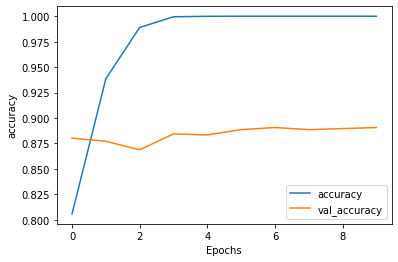

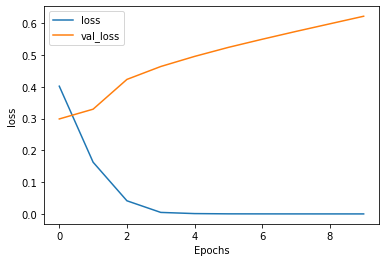

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")